# Recreating Roelof's PPA Model

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np
import nengo

seed = 18945
np.random.seed(seed)

STEP_SIZE = 1   # duration time step in ms
N_STEPs = 2000     # 2000 ms in total
N_CONCEPTs = 5   
N_LEMMAs = 5     
N_MORPHEMEs = 5  
N_PHONEMEs = 10   
N_SYLLABLEs = 5  

N_lesion_values = 100 # for 100 for weight lesion, 66 (!) for decay lesion

N_GROUPs = 4 # Normal, Nonfluent_agrammatic, Semantic_dementia, Logopenic
NORMAL = 0
NONFLUENT_AGRAMMATIC = 1
SEMANTIC_DEMENTIA = 2
LOGOPENIC = 3

N_TASKs = 3 # Naming, Comprehension, Repetition
NAMING = 0
COMPREHENSION = 1
REPETITION = 2

N_ASSESSMENTs = 6
ENGLISH = 0
DUTCH = 1
BRAMBATI_T1 = 2 # baseline 
BRAMBATI_T2 = 3 # follow up 
ROHRERMANDELLI_T1 = 4 # baseline 
ROHRERMANDELLI_T2 = 5 # follow up 

Y = 1.0     # connection present 
N = 0.0     # connection absent

# labeling network nodes
CAT = 0
DOG = 1
MAT = 2
FOG = 3
FISH = 4

pK = 0 # phonemes
pE = 1
pT = 2
pD = 3
pO = 4
pG = 5
pM = 6
pF = 7
pI = 8
pS = 9

Cat = 0
Dog = 1
Mat = 2
Fog = 3
Fish = 4

# connections conceptual network [N_CONCEPTs][N_CONCEPTs]
CC_con =  np.array([
    # CAT   DOG  MAT  FOG  FISH  
    [   N,    Y,   N,   N,    Y ], # CAT
    [   Y,    N,   N,   N,    Y ], # DOG
    [   N,    N,   N,   N,    N ], # MAT
    [   N,    N,   N,   N,    N ], # FOG
    [   Y,    Y,   N,   N,    N ]  # FISH
])

# connections between concept and lemma nodes [N_CONCEPTs][N_LEMMAs]
CL_con = np.array([
    [ Y,  N,  N,  N,  N ],
    [ N,  Y,  N,  N,  N ],
    [ N,  N,  Y,  N,  N ],
    [ N,  N,  N,  Y,  N ],
    [ N,  N,  N,  N,  Y ]
])

# connections between lemma nodes and morpheme nodes [N_LEMMAs][N_MORPHEMEs]
LM_con = np.array([
    [ Y,  N,  N,  N,  N ],
    [ N,  Y,  N,  N,  N ],
    [ N,  N,  Y,  N,  N ],
    [ N,  N,  N,  Y,  N ],
    [ N,  N,  N,  N,  Y ]
])

# connections between morpheme nodes and output phoneme nodes [N_MORPHEMEs][N_PHONEMEs]
MP_con = np.array([
     #  K  E  T  D  O  G  M  F  I  S  
    [   Y, Y, Y, N, N, N, N, N, N, N ], # <cat>
    [   N, N, N, Y, Y, Y, N, N, N, N ], # <dog>
    [   N, Y, Y, N, N, N, Y, N, N, N ], # <mat>
    [   N, N, N, N, Y, Y, N, Y, N, N ], # <fog>
    [   N, N, N, N, N, N, N, Y, Y, Y ]  # <fish>
])

# connections between output phoneme nodes and syllable program nodes [N_PHONEMEs][N_SYLLABLEs]
PS_con = np.array([
    # Cat Dog  Mat Fog  Fish
    [ Y,   N,   N,  N,   N ], # K
    [ Y,   N,   Y,  N,   N ], # E
    [ Y,   N,   Y,  N,   N ], # T
    [ N,   Y,   N,  N,   N ], # D
    [ N,   Y,   N,  Y,   N ], # O
    [ N,   Y,   N,  Y,   N ], # G
    [ N,   N,   Y,  N,   N ], # M
    [ N,   N,   N,  Y,   Y ], # F
    [ N,   N,   N,  N,   Y ], # I
    [ N,   N,   N,  N,   Y ]  # S
])

# connections between input and output phoneme nodes [N_PHONEMEs][N_PHONEMEs]
PP_con = np.array([
    # K    E    T   D    O    G   M   F   I  S 
    [ Y,   N,   N,  N,   N,   N,  N,  N,  N, N  ], # K
    [ N,   Y,   N,  N,   N,   N,  N,  N,  N, N  ], # E
    [ N,   N,   Y,  N,   N,   N,  N,  N,  N, N  ], # T
    [ N,   N,   N,  Y,   N,   N,  N,  N,  N, N  ], # D
    [ N,   N,   N,  N,   Y,   N,  N,  N,  N, N  ], # O
    [ N,   N,   N,  N,   N,   Y,  N,  N,  N, N  ], # G
    [ N,   N,   N,  N,   N,   N,  Y,  N,  N, N  ], # M
    [ N,   N,   N,  N,   N,   N,  N,  Y,  N, N  ], # F
    [ N,   N,   N,  N,   N,   N,  N,  N,  Y, N  ], # I
    [ N,   N,   N,  N,   N,   N,  N,  N,  N, Y  ]  # S
])

# connections between input phoneme nodes and input morpheme nodes [N_PHONEMEs][N_MORPHEMEs]
PiM_con = np.array([
    # Cat Dog  Mat Fog  Fish 
    [ Y,   N,   N,  N,   N ], # K
    [ Y,   N,   Y,  N,   N ], # E
    [ Y,   N,   Y,  N,   N ], # T
    [ N,   Y,   N,  N,   N ], # D
    [ N,   Y,   N,  Y,   N ], # O
    [ N,   Y,   N,  Y,   N ], # G
    [ N,   N,   Y,  N,   N ], # M
    [ N,   N,   N,  Y,   Y ], # F
    [ N,   N,   N,  N,   Y ], # I
    [ N,   N,   N,  N,   Y ]  # S
])

# connections between input morpheme and output morpheme nodes [N_MORPHEMEs][N_MORPHEMEs]
iMM_con = np.array([
    [ Y,  N,  N,  N,  N ],
    [ N,  Y,  N,  N,  N ],
    [ N,  N,  Y,  N,  N ],
    [ N,  N,  N,  Y,  N ],
    [ N,  N,  N,  N,  Y ]
])

# connections between input morpheme and lemma nodes [N_MORPHEMEs][N_LEMMAs]
iML_con = np.array([
    [ Y,  N,  N,  N,  N ],
    [ N,  Y,  N,  N,  N ],
    [ N,  N,  Y,  N,  N ],
    [ N,  N,  N,  Y,  N ],
    [ N,  N,  N,  N,  Y ]
])



In [2]:
# English data on PPA for single word tasks: Savage et al. (2013) [N_GROUPs][N_TASKs]
REAL_DATA_ENGLISH = np.array([
    # Naming  Comprehension Repetition
    [ 88.7,      97.0,      99.7 ], # Control
    [ 78.3,      94.3,      79.7 ], # nfvPPA
    [ 22.7,      63.3,      95.3 ], # svPPA
    [ 41.3,      84.7,      84.7 ]  # lvPPA
])

# Dutch data on PPA for single word tasks: Janssen et al. (2021) [N_GROUPs][N_TASKs]
REAL_DATA_DUTCH = np.array([
    # Naming  Comprehension Repetition */
    [ 90.3,      96.3,      96.7 ], # Control
    [ 77.3,      97.7,      89.3 ], # nfvPPA
    [ 29.0,      78.0,      96.3 ], # svPPA
    [ 66.3,      93.7,      91.3 ]  # lvPPA
])

# Brambati T1 data on PPA for single word tasks: Brambati et al. (2015) [N_GROUPs][N_TASKs]
REAL_DATA_BRAMBATI_T1 = np.array([
    # Naming  Comprehension Repetition 
    [ 90.3,      96.3,      96.7 ], # Control (dummy, from Savage)
    [ 85.3,      99.7,      83.7 ], # nfvPPA
    [ 26.7,      88.0,      90.6 ], # svPPA
    [ 69.3,      95.0,      69.0 ]  # lvPPA
])

# Brambati T2 data on PPA for single word tasks: Brambati et al. (2015) [N_GROUPs][N_TASKs]
REAL_DATA_BRAMBATI_T2 = np.array([
    # Naming  Comprehension Repetition
    [ 90.3,      96.3,      96.7 ], # Control (dummy, from Savage)
    [ 83.3,      94.8,      68.0 ], # nfvPPA
    [ 19.3,      66.7,      82.3 ], # svPPA
    [ 52.7,      95.0,      58.8 ]  # lvPPA
])

# Rohrer et al. (2013), logopenic patients (N=21), T1 baseline and T2 one year later
# Mandelli et al. (2016), nonfluent/agrammatic patients (N=34), T1 baseline and T2 one year later

# RohrerMandelli T1 data on PPA: Rohrer et al. (2013), Mandelli et al. (2016) [N_GROUPs][N_TASKs]
REAL_DATA_ROHRERMANDELLI_T1 = np.array([
    # Naming  Comprehension Repetition 
    [ 90.3,      96.3,      96.7 ], # Control (dummy, from Savage)
    [ 76.7,      99.0,      81.5 ], # nfvPPA
    [ 26.7,      88.0,      90.6 ], # svPPA (dummy, from Brambati)
    [ 61.0,      94.0,      94.0 ]  # lvPPA
])

# RohrerMandelli T2 data on PPA: Rohrer et al. (2013), Mandelli et al. (2016) [N_GROUPs][N_TASKs]
REAL_DATA_ROHRERMANDELLI_T2 = np.array([
    # Naming  Comprehension Repetition 
    [ 90.3,      96.3,      96.7 ], # Control (dummy, from Savage)
    [ 66.0,      90.0,      65.5 ], # nfvPPA
    [ 26.7,      88.0,      90.6 ], # svPPA (dummy, from Brambati)
    [ 43.0,      85.0,      77.0 ]  # lvPPA
])



In [3]:
# unscaled rate constants
SEM = 0.0101
LEM = 0.0074
LEX = 0.0120
DECAY = 0.0240
EXT = 0.1965

# parameter values
CYCLE_TIME = 25                 # ms per link 
SEM_rate = SEM * STEP_SIZE   # prop per step_size ms 
LEM_rate = LEM * STEP_SIZE   # prop per step_size ms 
LEX_rate = LEX * STEP_SIZE   # prop per step_size ms 
DECAY_rate = DECAY * STEP_SIZE # prop per step_size ms 
EXTIN = EXT * STEP_SIZE      # act_units per step_size ms 
LEMLEXFRAC = 0.3 
# fraction of LEX_rate spread between lemmas and output morphemes 
# implementing weak cascading of activation, see Roelofs (2008, JEP:LMC) 

FR = 0.10  # fraction of connection weight for input phoneme to input morpheme, cf. Roelofs (1997, Cognition)
SEGMENT_DURATION = 125  # ms
PICTURE_DURATION = 125  # ms

# set here to simulate weight or decay lesion and what to print 
WEIGHT_LESION = 1
DECAY_LESION = 0

SHOW_RESULTS_ALL_VALUES = 0 # set here whether to print all values 



In [4]:
# nengo settings

N_NEURONS = 100 # num neurons in a pop
DIM = 1 # dimensions
T = 2
CYCLE_TIME_NENGO = 0.025 
PICTURE_DURATION_NENGO = 0.125
SEGMENT_DURATION_NENGO = 0.125
tau = 0


### Model Definition

In [5]:
class Model:
    def __init__(
        self,
        CC_con = CC_con,
        CL_con = CL_con,
        LM_con = LM_con,
        MP_con = MP_con,
        PS_con = PS_con,
        PP_con = PP_con,
        PiM_con = PiM_con,
        iMM_con = iMM_con,
        iML_con = iML_con,
    ):
        
        self.CC_con = CC_con
        self.CL_con = CL_con
        self.LM_con = LM_con
        self.MP_con = MP_con
        self.PS_con = PS_con
        self.PP_con = PP_con
        self.PiM_con = PiM_con
        self.iMM_con = iMM_con
        self.iML_con = iML_con
        
        self.REAL_DATA = np.zeros(shape=(N_GROUPs, N_TASKs))
        self.SIM_DATA = np.zeros(shape=(N_GROUPs, N_TASKs))
        self.GOODNESS_OF_FIT = np.zeros(N_lesion_values)
        
        self.WEIGHT_value = np.zeros(N_lesion_values)
        self.DECAY_value = np.zeros(N_lesion_values)
        
        # concept and lemma
        self.C_node_act = np.zeros(N_CONCEPTs)
        self.L_node_act = np.zeros(N_LEMMAs)
        # output form 
        self.M_node_act = np.zeros(N_MORPHEMEs)
        self.oP_node_act = np.zeros(N_PHONEMEs)
        self.S_node_act = np.zeros(N_SYLLABLEs)
        # input form 
        self.iM_node_act = np.zeros(N_MORPHEMEs)
        self.iP_node_act = np.zeros(N_PHONEMEs)

        # input buffer for nodes 
        self.input_C = np.zeros(N_CONCEPTs)
        self.input_L = np.zeros(N_LEMMAs)
        self.input_M = np.zeros(N_MORPHEMEs)
        self.input_iM = np.zeros(N_MORPHEMEs)
        self.input_iP = np.zeros(N_PHONEMEs)
        self.input_oP = np.zeros(N_PHONEMEs)
        self.input_S = np.zeros(N_SYLLABLEs)
        
        # Aphasia parameters

        # weight lesion 
        self.CONNECTION_DECREASE_NONFLUENT_AGRAMMATIC = 0.0 # connections to/from output phonemes 
        self.CONNECTION_DECREASE_SEMANTIC_DEMENTIA = 0.0 # connections to/within/from conceptual network
        self.CONNECTION_DECREASE_LOGOPENIC = 0.0 # connections to/from lexical output forms, and b/w input/output phonemes
        
        # decay lesion
        self.DECAY_INCREASE_NONFLUENT_AGRAMMATIC = 0.0 # output phonemes 
        self.DECAY_INCREASE_SEMANTIC_DEMENTIA = 0.0 # concepts
        self.DECAY_INCREASE_LOGOPENIC = 0.0 # lexical output forms
        
        self.ACT_C = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))
        self.ACT_S = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))

        # Activation of target concept, cat
        self.ACT_CT = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))
        # Activation of conceptual relative, dog
        self.ACT_CR= np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))

        # Activation of target lemma, cat
        self.ACT_LT = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))
        # Activation of lemma relative, i.e., semantically related, dog
        self.ACT_LR = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))

        # Activation of target syllable, cat
        self.ACT_ST = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))
        # Activation of syllabic relative, mat
        self.ACT_SR = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))
        
        self.TOTAL_ACT_C = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_C = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.TOTAL_ACT_S = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_S = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        
        # T = target, R = relative
        self.TOTAL_ACT_CT = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_CT = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.TOTAL_ACT_CR = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_CR = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))

        self.TOTAL_ACT_LT = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_LT = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.TOTAL_ACT_LR = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_LR = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))

        self.TOTAL_ACT_ST = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_ST = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.TOTAL_ACT_SR = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_SR = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        
        
    def test(self):
        print('hi')
        
    
    def get_input_C(self):
        ext_input_C = lambda t: self.CONNECTION_DECREASE_SEMANTIC_DEMENTIA*EXT if t <= CYCLE_TIME_NENGO else (EXT*(self.CONNECTION_DECREASE_SEMANTIC_DEMENTIA + 1) if t <= PICTURE_DURATION_NENGO else (EXT if t <= (CYCLE_TIME_NENGO + PICTURE_DURATION_NENGO) else 0.0))
        return ext_input_C
    

    def get_input_iP(self):
        # phonetic inputs for comprehension and repetition tasks  
        ext_input_iP_pK = lambda t: EXT if t <= SEGMENT_DURATION_NENGO else 0.0
        ext_input_iP_pE = lambda t: 0.0 if t <= SEGMENT_DURATION_NENGO else (EXT if t <= 2*SEGMENT_DURATION_NENGO else 0.0)
        ext_input_iP_pT = lambda t: 0.0 if t <= 2*SEGMENT_DURATION_NENGO else (EXT if t <= 3*SEGMENT_DURATION_NENGO else 0.0) 
        
        return ext_input_iP_pK, ext_input_iP_pE, ext_input_iP_pT
        
        
    def nengo_model(self, lesion_value, group, task):
        model = nengo.Network(seed = seed)
        
        with model:
            
            ### CONCEPTS
            
            # create concept ensembles
            C_cat_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            C_dog_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            C_mat_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            C_fog_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            C_fish_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            
            # connection from input
            Bp = 1
            
            # input for naming task
            if task == NAMING:
                input_func_cat = self.get_input_C()
                cat_input = nengo.Node(input_func_cat)
                nengo.Connection(cat_input, C_cat_ens, synapse=tau, transform=Bp)
            
            # connections b/w concepts
            
            # recurrent connections
            # self.C_node_act = self.C_node_act * (1.0 - (DECAY_rate * self.DECAY_INCREASE_SEMANTIC_DEMENTIA)) + self.input_C
            Ap_C = 1.0 - (DECAY * self.DECAY_INCREASE_SEMANTIC_DEMENTIA)
            nengo.Connection(C_cat_ens, C_cat_ens, synapse=tau, transform=Ap_C)
            nengo.Connection(C_dog_ens, C_dog_ens, synapse=tau, transform=Ap_C)
            nengo.Connection(C_mat_ens, C_mat_ens, synapse=tau, transform=Ap_C)
            nengo.Connection(C_fog_ens, C_fog_ens, synapse=tau, transform=Ap_C)
            nengo.Connection(C_fish_ens, C_fish_ens, synapse=tau, transform=Ap_C)
            
            # relation connections
            # self.input_C[i] += (self.C_node_act[j] * (self.CC_con[j][i] * self.CONNECTION_DECREASE_SEMANTIC_DEMENTIA))
            CC_con_val = SEM * self.CONNECTION_DECREASE_SEMANTIC_DEMENTIA
            nengo.Connection(C_cat_ens, C_dog_ens, synapse=tau, transform=CC_con_val)
            nengo.Connection(C_dog_ens, C_cat_ens, synapse=tau, transform=CC_con_val)
            nengo.Connection(C_cat_ens, C_fish_ens, synapse=tau, transform=CC_con_val)
            nengo.Connection(C_fish_ens, C_cat_ens, synapse=tau, transform=CC_con_val)
            nengo.Connection(C_dog_ens, C_fish_ens, synapse=tau, transform=CC_con_val)
            nengo.Connection(C_fish_ens, C_dog_ens, synapse=tau, transform=CC_con_val)
            
            ###  LEMMAS
            
            # create lemma ensembles
            L_cat_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            L_dog_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            L_mat_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            L_fog_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            L_fish_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            
            # connections between lemmas
            
            # recurrent connections
            # self.L_node_act = self.L_node_act * (1.0 - DECAY_rate) + self.input_L
            Ap_L = 1.0 - DECAY
            nengo.Connection(L_cat_ens, L_cat_ens, synapse=tau, transform=Ap_L)
            nengo.Connection(L_dog_ens, L_dog_ens, synapse=tau, transform=Ap_L)
            nengo.Connection(L_mat_ens, L_mat_ens, synapse=tau, transform=Ap_L)
            nengo.Connection(L_fog_ens, L_fog_ens, synapse=tau, transform=Ap_L)
            nengo.Connection(L_fish_ens, L_fish_ens, synapse=tau, transform=Ap_L)
            
            # relation connections
            # self.input_C[i] += (self.L_node_act[j] * self.CL_con[j][i] * self.CONNECTION_DECREASE_SEMANTIC_DEMENTIA)
            CL_con_val = LEM * self.CONNECTION_DECREASE_SEMANTIC_DEMENTIA
            nengo.Connection(L_cat_ens, C_cat_ens, synapse=tau, transform=CL_con_val)
            nengo.Connection(L_dog_ens, C_dog_ens, synapse=tau, transform=CL_con_val)
            nengo.Connection(L_mat_ens, C_mat_ens, synapse=tau, transform=CL_con_val)
            nengo.Connection(L_fog_ens, C_fog_ens, synapse=tau, transform=CL_con_val)
            nengo.Connection(L_fish_ens, C_fish_ens, synapse=tau, transform=CL_con_val)
            # self.input_L[i] += (self.C_node_act[j] * self.CL_con[j][i] *  self.CONNECTION_DECREASE_SEMANTIC_DEMENTIA)
            nengo.Connection(C_cat_ens, L_cat_ens, synapse=tau, transform=CL_con_val)
            nengo.Connection(C_dog_ens, L_dog_ens, synapse=tau, transform=CL_con_val)
            nengo.Connection(C_mat_ens, L_mat_ens, synapse=tau, transform=CL_con_val)
            nengo.Connection(C_fog_ens, L_fog_ens, synapse=tau, transform=CL_con_val)
            nengo.Connection(C_fish_ens, L_fish_ens, synapse=tau, transform=CL_con_val)
            
            ### MORPHEMES
            
            # create input morpheme ensembles
            iM_cat_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            iM_dog_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            iM_mat_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            iM_fog_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            iM_fish_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            # create output morpheme ensembles
            M_cat_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            M_dog_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            M_mat_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            M_fog_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            M_fish_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            
            # connections b/w morphemes
            
            # recurrent connections
            # self.iM_node_act = self.iM_node_act * (1.0 - DECAY_rate) + self.input_iM
            Ap_iM = 1.0 - DECAY
            nengo.Connection(iM_cat_ens, iM_cat_ens, synapse=tau, transform=Ap_iM)
            nengo.Connection(iM_dog_ens, iM_dog_ens, synapse=tau, transform=Ap_iM)
            nengo.Connection(iM_mat_ens, iM_mat_ens, synapse=tau, transform=Ap_iM)
            nengo.Connection(iM_fog_ens, iM_fog_ens, synapse=tau, transform=Ap_iM)
            nengo.Connection(iM_fish_ens, iM_fish_ens, synapse=tau, transform=Ap_iM)
            # self.M_node_act = self.M_node_act * (1.0 - (DECAY_rate * self.DECAY_INCREASE_LOGOPENIC)) + self.input_M
            Ap_M = 1.0 - (DECAY * self.DECAY_INCREASE_LOGOPENIC)
            nengo.Connection(M_cat_ens, M_cat_ens, synapse=tau, transform=Ap_iM)
            nengo.Connection(M_dog_ens, M_dog_ens, synapse=tau, transform=Ap_iM)
            nengo.Connection(M_mat_ens, M_mat_ens, synapse=tau, transform=Ap_iM)
            nengo.Connection(M_fog_ens, M_fog_ens, synapse=tau, transform=Ap_iM)
            nengo.Connection(M_fish_ens, M_fish_ens, synapse=tau, transform=Ap_iM)
            
            # relation connections
            # self.input_L[i] += (self.iM_node_act[j] * self.iML_con[j][i])
            iML_con_val = LEX
            nengo.Connection(iM_cat_ens, L_cat_ens, synapse=tau, transform=iML_con_val)
            nengo.Connection(iM_dog_ens, L_dog_ens, synapse=tau, transform=iML_con_val)
            nengo.Connection(iM_mat_ens, L_mat_ens, synapse=tau, transform=iML_con_val)
            nengo.Connection(iM_fog_ens, L_fog_ens, synapse=tau, transform=iML_con_val)
            nengo.Connection(iM_fish_ens, L_fish_ens, synapse=tau, transform=iML_con_val)
            # self.input_M[i] += (self.L_node_act[j] * LEMLEXFRAC * self.LM_con[j][i] * self.CONNECTION_DECREASE_LOGOPENIC)
            LM_con_val = LEMLEXFRAC * LEX * self.CONNECTION_DECREASE_LOGOPENIC
            nengo.Connection(L_cat_ens, M_cat_ens, synapse=tau, transform=LM_con_val)
            nengo.Connection(L_dog_ens, M_dog_ens, synapse=tau, transform=LM_con_val)
            nengo.Connection(L_mat_ens, M_mat_ens, synapse=tau, transform=LM_con_val)
            nengo.Connection(L_fog_ens, M_fog_ens, synapse=tau, transform=LM_con_val)
            nengo.Connection(L_fish_ens, M_fish_ens, synapse=tau, transform=LM_con_val)
            # self.input_M[i] += (self.iM_node_act[j] * self.iMM_con[j][i] * self.CONNECTION_DECREASE_LOGOPENIC)
            iMM_con_val = LEX * self.CONNECTION_DECREASE_LOGOPENIC
            nengo.Connection(iM_cat_ens, M_cat_ens, synapse=tau, transform=iMM_con_val)
            nengo.Connection(iM_dog_ens, M_dog_ens, synapse=tau, transform=iMM_con_val)
            nengo.Connection(iM_mat_ens, M_mat_ens, synapse=tau, transform=iMM_con_val)
            nengo.Connection(iM_fog_ens, M_fog_ens, synapse=tau, transform=iMM_con_val)
            nengo.Connection(iM_fish_ens, M_fish_ens, synapse=tau, transform=iMM_con_val)
            
            ### PHONEMES
            
            # create input phoneme ensembles
            #  K  E  T  D  O  G  M  F  I  S 
            iP_K_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            iP_E_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            iP_T_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            iP_D_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            iP_O_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            iP_G_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            iP_M_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            iP_F_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            iP_I_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            iP_S_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            # create output phoneme ensembles
            oP_K_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            oP_E_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            oP_T_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            oP_D_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            oP_O_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            oP_G_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            oP_M_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            oP_F_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            oP_I_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            oP_S_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            
            # input for naming task
            if task == COMPREHENSION or task == REPETITION:
                input_func_pK, input_func_pE, input_func_pT = self.get_input_iP()
                pK_input = nengo.Node(input_func_pK)
                pE_input = nengo.Node(input_func_pE)
                pT_input = nengo.Node(input_func_pT)
                nengo.Connection(pK_input, iP_K_ens, synapse=tau, transform=Bp)
                nengo.Connection(pE_input, iP_E_ens, synapse=tau, transform=Bp)
                nengo.Connection(pT_input, iP_T_ens, synapse=tau, transform=Bp)
            
            # connections b/w phonemes
            
            # recurrent connections
            # self.oP_node_act = self.oP_node_act * (1.0 - (DECAY_rate * self.DECAY_INCREASE_NONFLUENT_AGRAMMATIC)) + self.input_oP
            Ap_oP = 1.0 - (DECAY * self.DECAY_INCREASE_NONFLUENT_AGRAMMATIC)
            nengo.Connection(oP_K_ens, oP_K_ens, synapse=tau, transform=Ap_oP)
            nengo.Connection(oP_E_ens, oP_E_ens, synapse=tau, transform=Ap_oP)
            nengo.Connection(oP_T_ens, oP_T_ens, synapse=tau, transform=Ap_oP)
            nengo.Connection(oP_D_ens, oP_D_ens, synapse=tau, transform=Ap_oP)
            nengo.Connection(oP_O_ens, oP_O_ens, synapse=tau, transform=Ap_oP)
            nengo.Connection(oP_G_ens, oP_G_ens, synapse=tau, transform=Ap_oP)
            nengo.Connection(oP_M_ens, oP_M_ens, synapse=tau, transform=Ap_oP)
            nengo.Connection(oP_F_ens, oP_F_ens, synapse=tau, transform=Ap_oP)
            nengo.Connection(oP_I_ens, oP_I_ens, synapse=tau, transform=Ap_oP)
            nengo.Connection(oP_S_ens, oP_S_ens, synapse=tau, transform=Ap_oP)
            # self.iP_node_act = self.iP_node_act * (1.0 - DECAY_rate) + self.input_iP
            Ap_oP = 1.0 - DECAY
            nengo.Connection(iP_K_ens, iP_K_ens, synapse=tau, transform=Ap_oP)
            nengo.Connection(iP_E_ens, iP_E_ens, synapse=tau, transform=Ap_oP)
            nengo.Connection(iP_T_ens, iP_T_ens, synapse=tau, transform=Ap_oP)
            nengo.Connection(iP_D_ens, iP_D_ens, synapse=tau, transform=Ap_oP)
            nengo.Connection(iP_O_ens, iP_O_ens, synapse=tau, transform=Ap_oP)
            nengo.Connection(iP_G_ens, iP_G_ens, synapse=tau, transform=Ap_oP)
            nengo.Connection(iP_M_ens, iP_M_ens, synapse=tau, transform=Ap_oP)
            nengo.Connection(iP_F_ens, iP_F_ens, synapse=tau, transform=Ap_oP)
            nengo.Connection(iP_I_ens, iP_I_ens, synapse=tau, transform=Ap_oP)
            nengo.Connection(iP_S_ens, iP_S_ens, synapse=tau, transform=Ap_oP)
            
            # relation connections
            # self.input_oP[i] += (self.M_node_act[j] * self.MP_con[j][i] * self.CONNECTION_DECREASE_NONFLUENT_AGRAMMATIC * self.CONNECTION_DECREASE_LOGOPENIC)
            MP_con_val = LEX * self.CONNECTION_DECREASE_NONFLUENT_AGRAMMATIC * self.CONNECTION_DECREASE_LOGOPENIC
            nengo.Connection(M_cat_ens, oP_K_ens, synapse=tau, transform=MP_con_val)
            nengo.Connection(M_cat_ens, oP_E_ens, synapse=tau, transform=MP_con_val)
            nengo.Connection(M_cat_ens, oP_T_ens, synapse=tau, transform=MP_con_val)
            nengo.Connection(M_dog_ens, oP_D_ens, synapse=tau, transform=MP_con_val)
            nengo.Connection(M_dog_ens, oP_O_ens, synapse=tau, transform=MP_con_val)
            nengo.Connection(M_dog_ens, oP_G_ens, synapse=tau, transform=MP_con_val)
            nengo.Connection(M_mat_ens, oP_M_ens, synapse=tau, transform=MP_con_val)
            nengo.Connection(M_mat_ens, oP_E_ens, synapse=tau, transform=MP_con_val)
            nengo.Connection(M_mat_ens, oP_T_ens, synapse=tau, transform=MP_con_val)
            nengo.Connection(M_fog_ens, oP_F_ens, synapse=tau, transform=MP_con_val)
            nengo.Connection(M_fog_ens, oP_O_ens, synapse=tau, transform=MP_con_val)
            nengo.Connection(M_fog_ens, oP_G_ens, synapse=tau, transform=MP_con_val)
            nengo.Connection(M_fish_ens, oP_F_ens, synapse=tau, transform=MP_con_val)
            nengo.Connection(M_fish_ens, oP_I_ens, synapse=tau, transform=MP_con_val)
            nengo.Connection(M_fish_ens, oP_S_ens, synapse=tau, transform=MP_con_val)
            # self.input_oP[i] += (self.iP_node_act[j] * self.PP_con[j][i] * self.CONNECTION_DECREASE_NONFLUENT_AGRAMMATIC * self.CONNECTION_DECREASE_LOGOPENIC)
            PP_con_val = LEX * self.CONNECTION_DECREASE_NONFLUENT_AGRAMMATIC * self.CONNECTION_DECREASE_LOGOPENIC
            nengo.Connection(iP_K_ens, oP_K_ens, synapse=tau, transform=PP_con_val)
            nengo.Connection(iP_E_ens, oP_E_ens, synapse=tau, transform=PP_con_val)
            nengo.Connection(iP_T_ens, oP_T_ens, synapse=tau, transform=PP_con_val)
            nengo.Connection(iP_D_ens, oP_D_ens, synapse=tau, transform=PP_con_val)
            nengo.Connection(iP_O_ens, oP_O_ens, synapse=tau, transform=PP_con_val)
            nengo.Connection(iP_G_ens, oP_G_ens, synapse=tau, transform=PP_con_val)
            nengo.Connection(iP_M_ens, oP_M_ens, synapse=tau, transform=PP_con_val)
            nengo.Connection(iP_F_ens, oP_F_ens, synapse=tau, transform=PP_con_val)
            nengo.Connection(iP_I_ens, oP_I_ens, synapse=tau, transform=PP_con_val)
            nengo.Connection(iP_S_ens, oP_S_ens, synapse=tau, transform=PP_con_val)
            # self.input_iP[i] += (self.oP_node_act[j] * self.PP_con[j][i] * self.CONNECTION_DECREASE_NONFLUENT_AGRAMMATIC * self.CONNECTION_DECREASE_LOGOPENIC)
            nengo.Connection(oP_K_ens, iP_K_ens, synapse=tau, transform=PP_con_val)
            nengo.Connection(oP_E_ens, iP_E_ens, synapse=tau, transform=PP_con_val)
            nengo.Connection(oP_T_ens, iP_T_ens, synapse=tau, transform=PP_con_val)
            nengo.Connection(oP_D_ens, iP_D_ens, synapse=tau, transform=PP_con_val)
            nengo.Connection(oP_O_ens, iP_O_ens, synapse=tau, transform=PP_con_val)
            nengo.Connection(oP_G_ens, iP_G_ens, synapse=tau, transform=PP_con_val)
            nengo.Connection(oP_M_ens, iP_M_ens, synapse=tau, transform=PP_con_val)
            nengo.Connection(oP_F_ens, iP_F_ens, synapse=tau, transform=PP_con_val)
            nengo.Connection(oP_I_ens, iP_I_ens, synapse=tau, transform=PP_con_val)
            nengo.Connection(oP_S_ens, iP_S_ens, synapse=tau, transform=PP_con_val)
            # self.input_iM[i] += (self.iP_node_act[j] * self.PiM_con[j][i])
            PiM_con_val = FR * LEX
            nengo.Connection(iP_K_ens, iM_cat_ens, synapse=tau, transform=PiM_con_val)
            nengo.Connection(iP_E_ens, iM_cat_ens, synapse=tau, transform=PiM_con_val)
            nengo.Connection(iP_T_ens, iM_cat_ens, synapse=tau, transform=PiM_con_val)
            nengo.Connection(iP_D_ens, iM_dog_ens, synapse=tau, transform=PiM_con_val)
            nengo.Connection(iP_O_ens, iM_dog_ens, synapse=tau, transform=PiM_con_val)
            nengo.Connection(iP_G_ens, iM_dog_ens, synapse=tau, transform=PiM_con_val)
            nengo.Connection(iP_M_ens, iM_mat_ens, synapse=tau, transform=PiM_con_val)
            nengo.Connection(iP_E_ens, iM_mat_ens, synapse=tau, transform=PiM_con_val)
            nengo.Connection(iP_T_ens, iM_mat_ens, synapse=tau, transform=PiM_con_val)
            nengo.Connection(iP_F_ens, iM_fog_ens, synapse=tau, transform=PiM_con_val)
            nengo.Connection(iP_O_ens, iM_fog_ens, synapse=tau, transform=PiM_con_val)
            nengo.Connection(iP_G_ens, iM_fog_ens, synapse=tau, transform=PiM_con_val)
            nengo.Connection(iP_F_ens, iM_fish_ens, synapse=tau, transform=PiM_con_val)
            nengo.Connection(iP_I_ens, iM_fish_ens, synapse=tau, transform=PiM_con_val)
            nengo.Connection(iP_S_ens, iM_fish_ens, synapse=tau, transform=PiM_con_val)
            
            ### SYLLABLE PROGRAMS
            
            # create syllable program ensembles
            S_cat_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            S_dog_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            S_mat_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            S_fog_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            S_fish_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            
            # connections b/w syllable programs
            
            # recurrent connections
            # self.S_node_act = self.S_node_act * (1.0 - DECAY_rate) + self.input_S
            Ap_S = 1.0 - DECAY
            nengo.Connection(S_cat_ens, S_cat_ens, synapse=tau, transform=Ap_S)
            nengo.Connection(S_dog_ens, S_dog_ens, synapse=tau, transform=Ap_S)
            nengo.Connection(S_mat_ens, S_mat_ens, synapse=tau, transform=Ap_S)
            nengo.Connection(S_fog_ens, S_fog_ens, synapse=tau, transform=Ap_S)
            nengo.Connection(S_fish_ens, S_fish_ens, synapse=tau, transform=Ap_S)
            
            # relation connections
            # self.input_S[i] += (self.oP_node_act[j] * self.PS_con[j][i] * self.CONNECTION_DECREASE_NONFLUENT_AGRAMMATIC)
            PS_con_val = LEX * self.CONNECTION_DECREASE_NONFLUENT_AGRAMMATIC
            nengo.Connection(oP_K_ens, S_cat_ens, synapse=tau, transform=PS_con_val)
            nengo.Connection(oP_E_ens, S_cat_ens, synapse=tau, transform=PS_con_val)
            nengo.Connection(oP_T_ens, S_cat_ens, synapse=tau, transform=PS_con_val)
            nengo.Connection(oP_D_ens, S_dog_ens, synapse=tau, transform=PS_con_val)
            nengo.Connection(oP_O_ens, S_dog_ens, synapse=tau, transform=PS_con_val)
            nengo.Connection(oP_G_ens, S_dog_ens, synapse=tau, transform=PS_con_val)
            nengo.Connection(oP_M_ens, S_mat_ens, synapse=tau, transform=PS_con_val)
            nengo.Connection(oP_E_ens, S_mat_ens, synapse=tau, transform=PS_con_val)
            nengo.Connection(oP_T_ens, S_mat_ens, synapse=tau, transform=PS_con_val)
            nengo.Connection(oP_F_ens, S_fog_ens, synapse=tau, transform=PS_con_val)
            nengo.Connection(oP_O_ens, S_fog_ens, synapse=tau, transform=PS_con_val)
            nengo.Connection(oP_G_ens, S_fog_ens, synapse=tau, transform=PS_con_val)
            nengo.Connection(oP_F_ens, S_fish_ens, synapse=tau, transform=PS_con_val)
            nengo.Connection(oP_I_ens, S_fish_ens, synapse=tau, transform=PS_con_val)
            nengo.Connection(oP_S_ens, S_fish_ens, synapse=tau, transform=PS_con_val)
            
            # probes
            if task == NAMING:
                probe_in = nengo.Probe(cat_input)
                
            if task == COMPREHENSION or task == REPETITION:
                probe_in = nengo.Probe(pK_input)
                
            probe_C = nengo.Probe(C_cat_ens)
            probe_S = nengo.Probe(S_cat_ens)
            probe_CT = nengo.Probe(C_cat_ens)
            probe_CR = nengo.Probe(C_dog_ens)
            probe_LT = nengo.Probe(L_cat_ens)
            probe_LR = nengo.Probe(L_dog_ens)
            probe_ST = nengo.Probe(S_cat_ens)
            probe_SR = nengo.Probe(S_mat_ens)
            
        with nengo.Simulator(model, progress_bar=False) as sim:
            sim.run(T)
            t = sim.trange()
            x = sim.data[probe_in]
            x_C = sim.data[probe_C]
            x_S = sim.data[probe_S]
            x_CT = sim.data[probe_CT]
            x_CR = sim.data[probe_CR]
            x_LT = sim.data[probe_LT]
            x_LR = sim.data[probe_LR]
            x_ST = sim.data[probe_ST]
            x_SR = sim.data[probe_SR]
            
        # saving activation of critical nodes
        self.ACT_C[lesion_value, :, group, task] = x_C.flatten()
        self.ACT_S[lesion_value, :, group, task] = x_S.flatten()
        self.ACT_CT[lesion_value, :, group, task] = x_CT.flatten()
        self.ACT_CR[lesion_value, :, group, task] = x_CR.flatten()
        self.ACT_LT[lesion_value, :, group, task] = x_LT.flatten()
        self.ACT_LR[lesion_value, :, group, task] = x_LR.flatten()
        self.ACT_ST[lesion_value, :, group, task] = x_ST.flatten()
        self.ACT_SR[lesion_value, :, group, task] = x_SR.flatten()
            
        return t, x, x_C
        
        
    def plot_activation(self):
        plt.figure()
        # N_lesion_values, N_STEPs, N_GROUPs, N_TASKs
        # NORMAL = 0, NONFLUENT_AGRAMMATIC = 1, SEMANTIC_DEMENTIA = 2, LOGOPENIC = 3
        # NAMING = 0, COMPREHENSION = 1, REPETITION = 2
        for i in range(N_lesion_values):
            plt.plot(self.ACT_C[i, :, 0, 0], label=f'{i}')
        plt.title('Roelof C')
        plt.ylim([0, None])
        plt.show()
        
        plt.figure()
        for i in range(N_lesion_values):
            plt.plot(self.ACT_LT[i, :, 0, 0], label=f'{i}')
        plt.title('Roelof LT')
        plt.ylim([0, None])
        plt.show()
        
        plt.figure()
        for i in range(N_lesion_values):
            plt.plot(self.ACT_CR[i, :, 0, 0], label=f'{i}')
        plt.title('Roelof CR')
        plt.ylim([0, None])
        plt.show()
        
        
    def plot_activation_nengo(self, lesion_value, group, task):
        t, x, x_hat = self.nengo_model(lesion_value, group, task)
        
        in_ = [4.9125000000000005,9.825000000000001,9.825000667781561,9.825001869959381,9.82500272509615,4.912503216953124,3.473655303682204e-06,2.9325537966604885e-06,1.7906538489855988e-06,9.63473050570425e-07,4.843373821926735e-07,2.3333969116069153e-07,1.0918798138585572e-07,5.002012645852661e-08,2.2547664159710646e-08,1.0035568397812841e-08,4.421091893642436e-09,1.9312881556992187e-09,8.376981386632366e-10,3.6116936621432784e-10,1.549105882223694e-10,6.614409630769253e-11,2.8130674802232873e-11,1.1921922038953034e-11,5.036805048828655e-12,2.1220068047741253e-12,8.917448078573953e-13,3.738860483154391e-13,1.56434194543311e-13,6.532740149957534e-14,2.7233176926876737e-14,1.1334448610236372e-14,4.710367330404825e-15,1.9548288778105695e-15,8.102230822401824e-16,3.3541336106352664e-16,1.3869800781853782e-16,5.729347567274587e-17,2.3643583098526635e-17,9.748104270532727e-18,4.015587830498096e-18,1.6528047251513252e-18,6.797622089241884e-19,2.7936601342577654e-19,1.1473286209620463e-19,4.7088530987580616e-20,1.9313888856985247e-20,7.917075176297147e-21,3.243489642635408e-21,1.3280804131208161e-21,5.43514294473893e-22,2.2232189857064505e-22,9.089656592833824e-23,3.714628366805963e-23,1.5173790673690383e-23,6.1957130309921946e-24,2.5287983341741494e-24,1.0317383755172254e-24,4.207884947193939e-25,1.7155487101427824e-25,6.991862547162191e-26,2.8486476816550304e-26,1.1602343968857989e-26,4.7240960291726706e-27,1.9229246895834228e-27,7.824935648706835e-28,3.183305796660626e-28,1.2946696737943068e-28,5.264127188245033e-29,2.1398539461979123e-29,8.696322941893424e-30,3.53333006060192e-30,1.4352676148527774e-30,5.828873884972542e-31,2.366695395436088e-31,9.607463016533419e-32,3.8992970818546317e-32,1.5822593328911906e-32,6.419262450593736e-33,2.6038203225619146e-33]
        
        plt.figure()
        #plt.plot(t, x, label='Input')
        plt.plot(t, x_hat, label='Output')
        #plt.plot(t, in_, label='Input R*')
        plt.legend()
        plt.title('Nengo')
        plt.ylim([0, None])
        plt.show()
    
    
    def set_real_data_matrix(self, assessment):
        if assessment == ENGLISH:
            self.REAL_DATA = REAL_DATA_ENGLISH
        elif assessment == DUTCH:
            self.REAL_DATA = REAL_DATA_DUTCH
        elif assessment == BRAMBATI_T1:
            self.REAL_DATA = REAL_DATA_BRAMBATI_T1
        elif assessment == BRAMBATI_T2:
            self.REAL_DATA = REAL_DATA_BRAMBATI_T2
        elif assessment == ROHRERMANDELLI_T1:
            self.REAL_DATA = REAL_DATA_ROHRERMANDELLI_T1
        elif (assessment == ROHRERMANDELLI_T2):
            self.REAL_DATA = REAL_DATA_ROHRERMANDELLI_T2
                    
                    
    def set_spreading_rates(self):
        self.ACT_C = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))
        self.ACT_S = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))
        self.ACT_CT = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))
        self.ACT_CR = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))
        self.ACT_LT = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))
        self.ACT_LR = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))
        self.ACT_ST = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))
        self.ACT_SR = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))

        self.CC_con *= SEM_rate
        self.CL_con *= LEM_rate
        self.LM_con *= LEX_rate
        self.MP_con *= LEX_rate
        self.PS_con *= LEX_rate

        # connections for input phonemes to output phonemes, input morphemes, input morphemes to lemmas

        self.PP_con *= LEX_rate
        self.PiM_con *= (FR * LEX_rate)
        self.iMM_con *= LEX_rate
        self.iML_con *= LEX_rate
        
        
    def reset_network(self):
        self.C_node_act = np.zeros(N_CONCEPTs)
        self.L_node_act = np.zeros(N_LEMMAs)
        self.M_node_act = np.zeros(N_MORPHEMEs)
        self.iM_node_act = np.zeros(N_MORPHEMEs)
        self.iP_node_act = np.zeros(N_PHONEMEs)
        self.oP_node_act = np.zeros(N_PHONEMEs)
        self.S_node_act = np.zeros(N_SYLLABLEs)
        
        
    def set_aphasic_parameters(self, group, lesion_value):
        WEIGHT_FACTOR, DECAY_FACTOR = 0.0, 0.0

        if WEIGHT_LESION:
            WEIGHT_FACTOR = self.WEIGHT_value[lesion_value]  
        else:
            WEIGHT_FACTOR = 1.0

        if DECAY_LESION:
            DECAY_FACTOR = self.DECAY_value[lesion_value]   
        else:
            DECAY_FACTOR = 1.0


        # setting of weight parameters

        if group == NONFLUENT_AGRAMMATIC:
            self.CONNECTION_DECREASE_NONFLUENT_AGRAMMATIC = WEIGHT_FACTOR
        else:
            self.CONNECTION_DECREASE_NONFLUENT_AGRAMMATIC = 1.0 # normal 

        if group == SEMANTIC_DEMENTIA:
            self.CONNECTION_DECREASE_SEMANTIC_DEMENTIA = WEIGHT_FACTOR
        else:
            self.CONNECTION_DECREASE_SEMANTIC_DEMENTIA = 1.0 # normal

        if group == LOGOPENIC:
            self.CONNECTION_DECREASE_LOGOPENIC = WEIGHT_FACTOR
        else:
            self.CONNECTION_DECREASE_LOGOPENIC = 1.0 # normal

        # setting of decay parameters

        if group == NONFLUENT_AGRAMMATIC:
            self.DECAY_INCREASE_NONFLUENT_AGRAMMATIC = DECAY_FACTOR
        else:
            self.DECAY_INCREASE_NONFLUENT_AGRAMMATIC = 1.0 # normal

        if group == SEMANTIC_DEMENTIA:
            self.DECAY_INCREASE_SEMANTIC_DEMENTIA = DECAY_FACTOR
        else:
            self.DECAY_INCREASE_SEMANTIC_DEMENTIA = 1.0 # normal

        if group == LOGOPENIC:
            self.DECAY_INCREASE_LOGOPENIC = DECAY_FACTOR
        else:
            self.DECAY_INCREASE_LOGOPENIC = 1.0 # normal
            
        
    # NETWORK UPDATING ROUTINES 

    def update_network(self, task, T):
        self.set_input_to_zero()
        self.get_external_input(task, T)
        self.get_internal_input()
        self.update_activation_of_nodes()
        
        
    def set_input_to_zero(self):
        self.input_C = np.zeros(N_CONCEPTs)
        self.input_L = np.zeros(N_LEMMAs)
        self.input_M = np.zeros(N_MORPHEMEs)
        self.input_iM = np.zeros(N_MORPHEMEs)
        self.input_iP = np.zeros(N_PHONEMEs)
        self.input_oP = np.zeros(N_PHONEMEs)
        self.input_S = np.zeros(N_SYLLABLEs)
        
        
    def get_external_input(self, task, T):
        if task == NAMING:
            # picture input
            if (T >= 0 and T < PICTURE_DURATION):
                self.input_C[CAT] += self.CONNECTION_DECREASE_SEMANTIC_DEMENTIA * EXTIN

            # enhancement
            if ((T >= (CYCLE_TIME)) and  (T < (CYCLE_TIME + PICTURE_DURATION))):
                self.input_C[CAT] += EXTIN
        

        if (task == COMPREHENSION or task == REPETITION): 

            # spoken word input
            if ((0 <= T) and (T < SEGMENT_DURATION)):
                self.input_iP[pK] += EXTIN

            if ((SEGMENT_DURATION <= T) and (T < (2 * SEGMENT_DURATION))):
                self.input_iP[pE] += EXTIN


            if ((2 * SEGMENT_DURATION <= T) and (T < (3 * SEGMENT_DURATION))): 
                self.input_iP[pT] += EXTIN
                
                
    def get_internal_input(self):
        # input activation for concept nodes

        for i in range(N_CONCEPTs):
            for j in range(N_CONCEPTs):
                self.input_C[i] += (self.C_node_act[j] * (self.CC_con[j][i] * self.CONNECTION_DECREASE_SEMANTIC_DEMENTIA))
                
        for i in range(N_CONCEPTs):
            for j in range(N_LEMMAs):
                self.input_C[i] += (self.L_node_act[j] * self.CL_con[j][i] * self.CONNECTION_DECREASE_SEMANTIC_DEMENTIA)

        # input activation for lemma nodes
        for i in range(N_LEMMAs):
            for j in range(N_CONCEPTs):
                self.input_L[i] += (self.C_node_act[j] * self.CL_con[j][i] *  self.CONNECTION_DECREASE_SEMANTIC_DEMENTIA)
                
        for i in range(N_LEMMAs):
            for j in range(N_MORPHEMEs):                 
                self.input_L[i] += (self.iM_node_act[j] * self.iML_con[j][i])
                
        # input activation for output morpheme nodes
        for i in range(N_MORPHEMEs):
            for j in range(N_LEMMAs):
                self.input_M[i] += (self.L_node_act[j] * LEMLEXFRAC * self.LM_con[j][i] 
                                    * self.CONNECTION_DECREASE_LOGOPENIC)

        for i in range(N_MORPHEMEs):
            for j in range(N_MORPHEMEs):
                self.input_M[i] += (self.iM_node_act[j] * self.iMM_con[j][i] * self.CONNECTION_DECREASE_LOGOPENIC)

        # input activation for output phoneme nodes
        for i in range(N_PHONEMEs):
            for j in range(N_MORPHEMEs):
                self.input_oP[i] += (self.M_node_act[j] * self.MP_con[j][i] 
                                     * self.CONNECTION_DECREASE_NONFLUENT_AGRAMMATIC * self.CONNECTION_DECREASE_LOGOPENIC)

        for i in range(N_PHONEMEs):
            for j in range(N_PHONEMEs):
                self.input_oP[i] += (self.iP_node_act[j] * self.PP_con[j][i] 
                                     * self.CONNECTION_DECREASE_NONFLUENT_AGRAMMATIC * self.CONNECTION_DECREASE_LOGOPENIC)
        
        # input activation for syllable program nodes
        for i in range(N_SYLLABLEs):
            for j in range(N_PHONEMEs):
                self.input_S[i] += (self.oP_node_act[j] * self.PS_con[j][i] 
                                    * self.CONNECTION_DECREASE_NONFLUENT_AGRAMMATIC)

        # input activation for input phoneme nodes
        for i in range(N_PHONEMEs):
            for j in range(N_PHONEMEs):
                self.input_iP[i] += (self.oP_node_act[j] * self.PP_con[j][i] 
                                     * self.CONNECTION_DECREASE_NONFLUENT_AGRAMMATIC * self.CONNECTION_DECREASE_LOGOPENIC)
        
        # input activation for input morpheme nodes
        for i in range(N_MORPHEMEs):
            for j in range(N_PHONEMEs):
                self.input_iM[i] += (self.iP_node_act[j] * self.PiM_con[j][i])
        
                
                
    def update_activation_of_nodes(self):
        self.C_node_act = self.C_node_act * (1.0 - (DECAY_rate * self.DECAY_INCREASE_SEMANTIC_DEMENTIA)) + self.input_C
        self.L_node_act = self.L_node_act * (1.0 - DECAY_rate) + self.input_L
        self.M_node_act = self.M_node_act * (1.0 - (DECAY_rate * self.DECAY_INCREASE_LOGOPENIC)) + self.input_M
        self.oP_node_act = self.oP_node_act * (1.0 - (DECAY_rate * self.DECAY_INCREASE_NONFLUENT_AGRAMMATIC)) + self.input_oP
        self.iP_node_act = self.iP_node_act * (1.0 - DECAY_rate) + self.input_iP
        self.iM_node_act = self.iM_node_act * (1.0 - DECAY_rate) + self.input_iM
        self.S_node_act = self.S_node_act * (1.0 - DECAY_rate) + self.input_S
            
    
    def determine_activation_critical_nodes(self, lesion_value, step, group, task):
        self.ACT_C[lesion_value][step][group][task] = self.C_node_act[CAT]
        self.ACT_S[lesion_value][step][group][task] = self.S_node_act[CAT]
        self.ACT_CT[lesion_value][step][group][task] = self.C_node_act[CAT]
        self.ACT_CR[lesion_value][step][group][task] = self.C_node_act[DOG]
        self.ACT_LT[lesion_value][step][group][task] = self.L_node_act[CAT]
        self.ACT_LR[lesion_value][step][group][task] = self.L_node_act[DOG]
        self.ACT_ST[lesion_value][step][group][task] = self.S_node_act[CAT]
        self.ACT_SR[lesion_value][step][group][task] = self.S_node_act[MAT]
        
        
    def compute_activation_results(self):
        self.TOTAL_ACT_C = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.TOTAL_ACT_S = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_C = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_S = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))

        self.TOTAL_ACT_CT = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.TOTAL_ACT_CR = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_CT = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_CR = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))

        self.TOTAL_ACT_LT = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.TOTAL_ACT_LR = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_LT = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_LR = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))

        self.TOTAL_ACT_ST = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.TOTAL_ACT_SR = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_ST = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_SR = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))

        for lesion_value in range(N_lesion_values):
            for group in range(N_GROUPs):
                for task in range(N_TASKs): 
                    for i in range(N_STEPs): 
                        self.TOTAL_ACT_C[lesion_value][group][task] += self.ACT_C[lesion_value][i][group][task]
                        self.TOTAL_ACT_S[lesion_value][group][task] += self.ACT_S[lesion_value][i][group][task]
                        self.TOTAL_ACT_CT[lesion_value][group][task] += self.ACT_CT[lesion_value][i][group][task]
                        self.TOTAL_ACT_CR[lesion_value][group][task] += self.ACT_CR[lesion_value][i][group][task]
                        self.TOTAL_ACT_LT[lesion_value][group][task] += self.ACT_LT[lesion_value][i][group][task]
                        self.TOTAL_ACT_LR[lesion_value][group][task] += self.ACT_LR[lesion_value][i][group][task]
                        self.TOTAL_ACT_ST[lesion_value][group][task] += self.ACT_ST[lesion_value][i][group][task]
                        self.TOTAL_ACT_SR[lesion_value][group][task] += self.ACT_SR[lesion_value][i][group][task]

                    self.MEAN_ACT_C[lesion_value][group][task] = (self.TOTAL_ACT_C[lesion_value][group][task] / N_STEPs)
                    self.MEAN_ACT_S[lesion_value][group][task] = (self.TOTAL_ACT_S[lesion_value][group][task] / N_STEPs)
                    self.MEAN_ACT_CT[lesion_value][group][task] = (self.TOTAL_ACT_CT[lesion_value][group][task] / N_STEPs)
                    self.MEAN_ACT_CR[lesion_value][group][task] = (self.TOTAL_ACT_CR[lesion_value][group][task] / N_STEPs)
                    self.MEAN_ACT_LT[lesion_value][group][task] = (self.TOTAL_ACT_LT[lesion_value][group][task] / N_STEPs)
                    self.MEAN_ACT_LR[lesion_value][group][task] = (self.TOTAL_ACT_LR[lesion_value][group][task] / N_STEPs)
                    self.MEAN_ACT_ST[lesion_value][group][task] = (self.TOTAL_ACT_ST[lesion_value][group][task] / N_STEPs)
                    self.MEAN_ACT_SR[lesion_value][group][task] = (self.TOTAL_ACT_SR[lesion_value][group][task] / N_STEPs)
                    
                    
    # FITS AND PRINTING

    def print_heading(self):
        print("\n")
        print("WEAVER++/ARC model simulation of primary progressive aphasia (c) Ardi Roelofs\n")
        print("Simulation of group studies \n")
        
        
    def print_parameters(self):
        print("Parameter values:\n")
        print(f"cycle time : {CYCLE_TIME : 6d} [ms]\n")
        print(f"sem_rate   : {SEM_rate/STEP_SIZE : .4f} [prop/ms]\n")
        print(f"lem_rate   : {LEM_rate/STEP_SIZE : .4f} [prop/ms]\n")
        print(f"exin       : {EXTIN/STEP_SIZE : .4f} [act_units/ms]\n")
        print(f"d          : {DECAY_rate/STEP_SIZE : .4f} [prop/ms]\n")
        
        
    def compute_fits_and_print_results_on_screen(self, assessment):
        LV = 0.0 # lesion value

        self.SIM_DATA = np.zeros(shape=(N_GROUPs, N_TASKs))
        self.GOODNESS_OF_FIT = np.zeros(N_lesion_values)

        if assessment == ENGLISH:
            print("\nAssessment is Savage et al. (2013), English\n")
        if assessment == DUTCH:
            print("\nAssessment is Janssen et al. (2022), Dutch\n")
        if assessment == BRAMBATI_T1:
            print("\nAssessment is Brambati et al. (2015), baseline T1\n")
        if assessment == BRAMBATI_T2:
            print("\nAssessment is Brambati et al. (2015), follow up T2\n")
        if assessment == ROHRERMANDELLI_T1:
            print("\nAssessment is Rohrer et al. (2013) and Mandelli et al. (2016), baseline T1\n")
        if assessment == ROHRERMANDELLI_T2:
            print("\nAssessment is Rohrer et al. (2013) and Mandelli et al. (2016), follow up T2\n")


        for group in range(N_GROUPs): 
            print(" \n")

            if group == NORMAL:
                print("NORMAL \n")
            elif group == NONFLUENT_AGRAMMATIC:
                print("NONFLUENT/AGRAMMATIC \n")
            elif group == SEMANTIC_DEMENTIA:
                print("SEMANTIC DEMENTIA  \n")
            elif group == LOGOPENIC:
                print("LOGOPENIC  \n")

            if assessment == ENGLISH:
                print("\nSavage et al. (2013), English\n")
            if assessment == DUTCH:
                print("\nAssessment is Janssen et al. (2022), Dutch\n")
            if assessment == BRAMBATI_T1:
                print("\nAssessment is Brambati et al. (2015), baseline T1\n")
            if assessment == BRAMBATI_T2:
                print("\nAssessment is Brambati et al. (2015), follow up T2\n")
            if assessment == ROHRERMANDELLI_T1:
                print("\nAssessment is Rohrer et al. (2013) and Mandelli et al. (2016), baseline T1\n")
            if assessment == ROHRERMANDELLI_T2:
                print("\nAssessment is Rohrer et al. (2013) and Mandelli et al. (2016), follow up T2\n")

            print("        Naming   Comprehension  Repetition \n")
            print(f"Real:   {self.REAL_DATA[group][NAMING] : 5.2f}         {self.REAL_DATA[group][COMPREHENSION] : 5.2f}        {self.REAL_DATA[group][REPETITION] : 5.2f} \n")
            print("Lesion:                                    MAE\n")


            for lesion_value in range(N_lesion_values): 

                self.SIM_DATA[group][NAMING] = (self.MEAN_ACT_ST[lesion_value][group][NAMING] - self.MEAN_ACT_SR[lesion_value][group][NAMING]) / (self.MEAN_ACT_ST[lesion_value][NORMAL][NAMING] - self.MEAN_ACT_SR[lesion_value][NORMAL][NAMING]) * 100.0

                self.SIM_DATA[group][COMPREHENSION] = (self.MEAN_ACT_CT[lesion_value][group][COMPREHENSION] - self.MEAN_ACT_CR[lesion_value][group][COMPREHENSION]) / (self.MEAN_ACT_CT[lesion_value][NORMAL][COMPREHENSION] - self.MEAN_ACT_CR[lesion_value][NORMAL][COMPREHENSION]) * 100.0

                self.SIM_DATA[group][REPETITION] = (self.MEAN_ACT_ST[lesion_value][group][REPETITION] - self.MEAN_ACT_SR[lesion_value][group][REPETITION]) / (self.MEAN_ACT_ST[lesion_value][NORMAL][REPETITION] - self.MEAN_ACT_SR[lesion_value][NORMAL][REPETITION]) * 100.0

                if group == NORMAL:
                    LV = 1.0
                elif WEIGHT_LESION:
                    LV = self.WEIGHT_value[lesion_value]
                elif DECAY_LESION:
                    LV = self.DECAY_value[lesion_value]

                self.GOODNESS_OF_FIT[lesion_value] = (abs(self.REAL_DATA[group][NAMING] - self.SIM_DATA[group][NAMING])
                    + abs(self.REAL_DATA[group][COMPREHENSION] - self.SIM_DATA[group][COMPREHENSION])
                    + abs(self.REAL_DATA[group][REPETITION] - self.SIM_DATA[group][REPETITION]) ) / 3.0

                if SHOW_RESULTS_ALL_VALUES: # toggle for printing the results for all lesion values 
                    sim_combined = (abs(self.REAL_DATA[group][NAMING] - self.SIM_DATA[group][NAMING]) 
                                    + abs(self.REAL_DATA[group][COMPREHENSION] - self.SIM_DATA[group][COMPREHENSION]) 
                                    + abs(self.REAL_DATA[group][REPETITION] - self.SIM_DATA[group][REPETITION])) / 3.0
                    
                    print(f"{LV : 5.2f}   {self.SIM_DATA[group][NAMING] : 5.2f}        {self.SIM_DATA[group][COMPREHENSION] : 5.2f}        {self.SIM_DATA[group][REPETITION] : 5.2f}     {sim_combined : 5.2f}\n")

            a = 0
            for i in range(N_lesion_values):
                if self.GOODNESS_OF_FIT[a] > self.GOODNESS_OF_FIT[i]:
                    a = i


            if WEIGHT_LESION:
                print(f"Best fit weight value = {self.WEIGHT_value[a] : .2f}   MAE = {self.GOODNESS_OF_FIT[a] : .2f}\n")
            if DECAY_LESION:
                print(f"Best fit decay value = {self.DECAY_value[a] : .2f}   MAE = {self.GOODNESS_OF_FIT[a] : .2f}\n")

            sim_naming = (self.MEAN_ACT_ST[a][group][NAMING] - self.MEAN_ACT_SR[a][group][NAMING]) / (self.MEAN_ACT_ST[a][NORMAL][NAMING] - self.MEAN_ACT_SR[a][NORMAL][NAMING]) * 100.0
            sim_comprehension = (self.MEAN_ACT_CT[a][group][COMPREHENSION] - self.MEAN_ACT_CR[a][group][COMPREHENSION]) / (self.MEAN_ACT_CT[a][NORMAL][COMPREHENSION] - self.MEAN_ACT_CR[a][NORMAL][COMPREHENSION]) * 100.0
            sim_repetition = (self.MEAN_ACT_ST[a][group][REPETITION] - self.MEAN_ACT_SR[a][group][REPETITION]) / (self.MEAN_ACT_ST[a][NORMAL][REPETITION] - self.MEAN_ACT_SR[a][NORMAL][REPETITION]) * 100.0
                
            print(f"Sim:   {sim_naming : 5.2f}         {sim_comprehension : 5.2f}        {sim_repetition : 5.2f} \n")


    def print_assessment_results(self):
        for assessment in range(N_ASSESSMENTs):
            self.set_real_data_matrix(assessment)
            self.compute_activation_results()
            self.compute_fits_and_print_results_on_screen(assessment)
            input()
            
    
    # MAIN ROUTINES 

    def main(self):
        ls = 0.0 # exact lesion value 

        self.print_heading()
        self.print_parameters()
        self.set_spreading_rates()

        if WEIGHT_LESION:
            ls = 0.0
            for lesion_value in range(N_lesion_values):
                # values between maximally damaged, 0.0, and minimally damaged, 0.99
                self.WEIGHT_value[lesion_value] = ls 
                ls += 0.01

        if DECAY_LESION:
             # values between minimally damaged, 1.01, and maximally damaged, i.e., full decay, 1.66
            ls = 1.01
            for lesion_value in range(N_lesion_values):
                self.DECAY_value[lesion_value] = ls
                ls += 0.01
                
        
        # running model
        for group in range(N_GROUPs):
            for task in range(N_TASKs): 
                for lesion_value in range(N_lesion_values): 
                    print(f'Running group {group}, task {task}, lv {lesion_value}.')
                        
                    self.reset_network()
                    self.set_aphasic_parameters(group, lesion_value)
                        
                    self.nengo_model(lesion_value, group, task)
                        
                        
                    '''

                    T = 0 # time in ms
                    step = 0
                    while T < (N_STEPs * STEP_SIZE):

                        self.update_network(task, T)
                        self.determine_activation_critical_nodes(lesion_value, step, group, task)

                        T += STEP_SIZE
                        step += 1
                    '''
                            
                    if group == 0 and task == 0 and lesion_value == 0:
                        self.plot_activation_nengo(lesion_value, group, task)
                            

        # MAPPING TO HUMAN DATA
        self.print_assessment_results()

        print('Finished.')
        
        

### Run the model:



WEAVER++/ARC model simulation of primary progressive aphasia (c) Ardi Roelofs

Simulation of group studies 

Parameter values:

cycle time :     25 [ms]

sem_rate   :  0.0101 [prop/ms]

lem_rate   :  0.0074 [prop/ms]

exin       :  0.1965 [act_units/ms]

d          :  0.0240 [prop/ms]

Running group 0, task 0, lv 0.


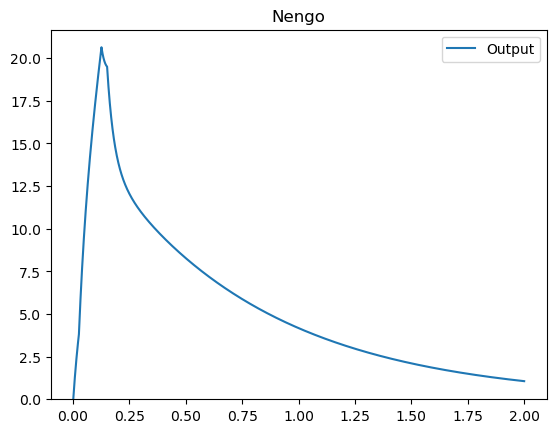

Running group 0, task 0, lv 1.
Running group 0, task 0, lv 2.
Running group 0, task 0, lv 3.
Running group 0, task 0, lv 4.
Running group 0, task 0, lv 5.
Running group 0, task 0, lv 6.
Running group 0, task 0, lv 7.
Running group 0, task 0, lv 8.
Running group 0, task 0, lv 9.
Running group 0, task 0, lv 10.
Running group 0, task 0, lv 11.
Running group 0, task 0, lv 12.
Running group 0, task 0, lv 13.
Running group 0, task 0, lv 14.
Running group 0, task 0, lv 15.
Running group 0, task 0, lv 16.
Running group 0, task 0, lv 17.
Running group 0, task 0, lv 18.
Running group 0, task 0, lv 19.
Running group 0, task 0, lv 20.
Running group 0, task 0, lv 21.
Running group 0, task 0, lv 22.
Running group 0, task 0, lv 23.
Running group 0, task 0, lv 24.
Running group 0, task 0, lv 25.
Running group 0, task 0, lv 26.
Running group 0, task 0, lv 27.
Running group 0, task 0, lv 28.
Running group 0, task 0, lv 29.
Running group 0, task 0, lv 30.
Running group 0, task 0, lv 31.
Running group 0, 

Running group 0, task 2, lv 58.
Running group 0, task 2, lv 59.
Running group 0, task 2, lv 60.
Running group 0, task 2, lv 61.
Running group 0, task 2, lv 62.
Running group 0, task 2, lv 63.
Running group 0, task 2, lv 64.
Running group 0, task 2, lv 65.
Running group 0, task 2, lv 66.
Running group 0, task 2, lv 67.
Running group 0, task 2, lv 68.
Running group 0, task 2, lv 69.
Running group 0, task 2, lv 70.
Running group 0, task 2, lv 71.
Running group 0, task 2, lv 72.
Running group 0, task 2, lv 73.
Running group 0, task 2, lv 74.
Running group 0, task 2, lv 75.
Running group 0, task 2, lv 76.
Running group 0, task 2, lv 77.
Running group 0, task 2, lv 78.
Running group 0, task 2, lv 79.
Running group 0, task 2, lv 80.
Running group 0, task 2, lv 81.
Running group 0, task 2, lv 82.
Running group 0, task 2, lv 83.
Running group 0, task 2, lv 84.
Running group 0, task 2, lv 85.
Running group 0, task 2, lv 86.
Running group 0, task 2, lv 87.
Running group 0, task 2, lv 88.
Running 

Running group 1, task 2, lv 15.
Running group 1, task 2, lv 16.
Running group 1, task 2, lv 17.
Running group 1, task 2, lv 18.
Running group 1, task 2, lv 19.
Running group 1, task 2, lv 20.
Running group 1, task 2, lv 21.
Running group 1, task 2, lv 22.
Running group 1, task 2, lv 23.
Running group 1, task 2, lv 24.
Running group 1, task 2, lv 25.
Running group 1, task 2, lv 26.
Running group 1, task 2, lv 27.
Running group 1, task 2, lv 28.
Running group 1, task 2, lv 29.
Running group 1, task 2, lv 30.
Running group 1, task 2, lv 31.
Running group 1, task 2, lv 32.
Running group 1, task 2, lv 33.
Running group 1, task 2, lv 34.
Running group 1, task 2, lv 35.
Running group 1, task 2, lv 36.
Running group 1, task 2, lv 37.
Running group 1, task 2, lv 38.
Running group 1, task 2, lv 39.
Running group 1, task 2, lv 40.
Running group 1, task 2, lv 41.
Running group 1, task 2, lv 42.
Running group 1, task 2, lv 43.
Running group 1, task 2, lv 44.
Running group 1, task 2, lv 45.
Running 

Running group 2, task 1, lv 72.
Running group 2, task 1, lv 73.
Running group 2, task 1, lv 74.
Running group 2, task 1, lv 75.
Running group 2, task 1, lv 76.
Running group 2, task 1, lv 77.
Running group 2, task 1, lv 78.
Running group 2, task 1, lv 79.
Running group 2, task 1, lv 80.
Running group 2, task 1, lv 81.
Running group 2, task 1, lv 82.
Running group 2, task 1, lv 83.
Running group 2, task 1, lv 84.
Running group 2, task 1, lv 85.
Running group 2, task 1, lv 86.
Running group 2, task 1, lv 87.
Running group 2, task 1, lv 88.
Running group 2, task 1, lv 89.
Running group 2, task 1, lv 90.
Running group 2, task 1, lv 91.
Running group 2, task 1, lv 92.
Running group 2, task 1, lv 93.
Running group 2, task 1, lv 94.
Running group 2, task 1, lv 95.
Running group 2, task 1, lv 96.
Running group 2, task 1, lv 97.
Running group 2, task 1, lv 98.
Running group 2, task 1, lv 99.
Running group 2, task 2, lv 0.
Running group 2, task 2, lv 1.
Running group 2, task 2, lv 2.
Running gro

Running group 3, task 1, lv 29.
Running group 3, task 1, lv 30.
Running group 3, task 1, lv 31.
Running group 3, task 1, lv 32.
Running group 3, task 1, lv 33.
Running group 3, task 1, lv 34.
Running group 3, task 1, lv 35.
Running group 3, task 1, lv 36.
Running group 3, task 1, lv 37.
Running group 3, task 1, lv 38.
Running group 3, task 1, lv 39.
Running group 3, task 1, lv 40.
Running group 3, task 1, lv 41.
Running group 3, task 1, lv 42.
Running group 3, task 1, lv 43.
Running group 3, task 1, lv 44.
Running group 3, task 1, lv 45.
Running group 3, task 1, lv 46.
Running group 3, task 1, lv 47.
Running group 3, task 1, lv 48.
Running group 3, task 1, lv 49.
Running group 3, task 1, lv 50.
Running group 3, task 1, lv 51.
Running group 3, task 1, lv 52.
Running group 3, task 1, lv 53.
Running group 3, task 1, lv 54.
Running group 3, task 1, lv 55.
Running group 3, task 1, lv 56.
Running group 3, task 1, lv 57.
Running group 3, task 1, lv 58.
Running group 3, task 1, lv 59.
Running 



Assessment is Brambati et al. (2015), follow up T2

 

NORMAL 


Assessment is Brambati et al. (2015), follow up T2

        Naming   Comprehension  Repetition 

Real:    90.30          96.30         96.70 

Lesion:                                    MAE

Best fit weight value =  0.00   MAE =  5.57

Sim:    100.00          100.00         100.00 

 

NONFLUENT/AGRAMMATIC 


Assessment is Brambati et al. (2015), follow up T2

        Naming   Comprehension  Repetition 

Real:    83.30          94.80         68.00 

Lesion:                                    MAE

Best fit weight value =  0.93   MAE =  5.14

Sim:    82.64          94.97         82.60 

 

SEMANTIC DEMENTIA  


Assessment is Brambati et al. (2015), follow up T2

        Naming   Comprehension  Repetition 

Real:    19.30          66.70         82.30 

Lesion:                                    MAE

Best fit weight value =  0.62   MAE =  8.17

Sim:    12.31          67.12         99.41 

 

LOGOPENIC  


Assessment is Bram

In [6]:
m = Model()
m.main()

In [8]:
import pickle

# save mean activations for later
with open('outputs/mean_act_nengo_direct.pkl', 'wb') as f: 
    pickle.dump([
        m.MEAN_ACT_C, 
        m.MEAN_ACT_S,
        m.MEAN_ACT_CT,
        m.MEAN_ACT_CR,
        m.MEAN_ACT_LT,
        m.MEAN_ACT_LR,
        m.MEAN_ACT_ST,
        m.MEAN_ACT_SR
    ], f)
    
print(m.MEAN_ACT_C)

[[[5.55114842e+00 8.62730659e-02 8.62730659e-02]
  [5.52999567e+00 6.21592825e-02 6.21592825e-02]
  [5.11718750e-01 0.00000000e+00 0.00000000e+00]
  [5.52999567e+00 6.21592825e-02 6.21592825e-02]]

 [[5.55114842e+00 8.62730659e-02 8.62730659e-02]
  [5.52999721e+00 6.21610213e-02 6.21610213e-02]
  [5.16859255e-01 1.64659128e-04 1.64659128e-04]
  [5.52999569e+00 6.21608193e-02 6.21608193e-02]]

 [[5.55114842e+00 8.62730659e-02 8.62730659e-02]
  [5.53000184e+00 6.21662383e-02 6.21662383e-02]
  [5.22047650e-01 3.29363052e-04 3.29363052e-04]
  [5.52999579e+00 6.21654382e-02 6.21654382e-02]]

 ...

 [[5.55114842e+00 8.62730659e-02 8.62730659e-02]
  [5.54947285e+00 8.43415581e-02 8.43415581e-02]
  [4.02336850e+00 6.28245040e-02 6.28245040e-02]
  [5.54886637e+00 8.42355458e-02 8.42355458e-02]]

 [[5.55114842e+00 8.62730659e-02 8.62730659e-02]
  [5.55001776e+00 8.49692722e-02 8.49692722e-02]
  [4.43479463e+00 6.92598701e-02 6.92598701e-02]
  [5.54960153e+00 8.48960245e-02 8.48960245e-02]]

 [[5

In [9]:
# load mean activations
with open('outputs/mean_act_nengo_direct.pkl', 'rb') as f:
    mean_C, mean_S, mean_CT, mean_CR, mean_LT, mean_LR, mean_ST, mean_SR = pickle.load(f)
    
print(mean_C)

[[[5.55114842e+00 8.62730659e-02 8.62730659e-02]
  [5.52999567e+00 6.21592825e-02 6.21592825e-02]
  [5.11718750e-01 0.00000000e+00 0.00000000e+00]
  [5.52999567e+00 6.21592825e-02 6.21592825e-02]]

 [[5.55114842e+00 8.62730659e-02 8.62730659e-02]
  [5.52999721e+00 6.21610213e-02 6.21610213e-02]
  [5.16859255e-01 1.64659128e-04 1.64659128e-04]
  [5.52999569e+00 6.21608193e-02 6.21608193e-02]]

 [[5.55114842e+00 8.62730659e-02 8.62730659e-02]
  [5.53000184e+00 6.21662383e-02 6.21662383e-02]
  [5.22047650e-01 3.29363052e-04 3.29363052e-04]
  [5.52999579e+00 6.21654382e-02 6.21654382e-02]]

 ...

 [[5.55114842e+00 8.62730659e-02 8.62730659e-02]
  [5.54947285e+00 8.43415581e-02 8.43415581e-02]
  [4.02336850e+00 6.28245040e-02 6.28245040e-02]
  [5.54886637e+00 8.42355458e-02 8.42355458e-02]]

 [[5.55114842e+00 8.62730659e-02 8.62730659e-02]
  [5.55001776e+00 8.49692722e-02 8.49692722e-02]
  [4.43479463e+00 6.92598701e-02 6.92598701e-02]
  [5.54960153e+00 8.48960245e-02 8.48960245e-02]]

 [[5